# Descriptive analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import nltk
# nltk.download('stopwords')
from collections import Counter, defaultdict
pd.set_option('display.max_rows', 10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('bbc_wiki.csv', index_col='Unnamed: 0')
df['duration'] = df['duration'].str.extract('(\d+)').astype(int)
df

,time,duration,book,luxury,favourite,availibility,number,guests,links,index,year,name,gender,career,birth,country
1,2023-05-28,35,NaN,NaN,NaN,False,0,"Ronnie O'Sullivan, snooker player",https://www.bbc.co.uk/programmes/m001mc30,1,2023,Ronnie O'Sullivan,male,pool player,+1975-12-05,United Kingdom
2,2023-05-26,43,NaN,NaN,NaN,False,8,Desert Island Discs - Professor Sharon Peacock...,https://www.bbc.co.uk/programmes/m001m4nx,2,2023,Sharon Peacock,female,microbiologist,+1959-03-24,NaN
3,2023-05-19,44,NaN,NaN,NaN,False,8,"Simon Pegg, actor",https://www.bbc.co.uk/programmes/m001ly7j,3,2023,Simon Pegg,male,actor,+1970-02-14,United Kingdom
4,2023-05-12,37,NaN,NaN,NaN,False,8,"Professor Peter Hennessy, historian",https://www.bbc.co.uk/programmes/m001lr3k,4,2023,Peter Hennessy,male,politician,+1947-03-28,United Kingdom
5,2023-03-31,43,NaN,NaN,NaN,True,9,"Dara Ó Briain, comedian and television presenter",https://www.bbc.co.uk/programmes/m001kgn0,5,2023,Dara Ó Briain,male,television presenter,+1972-02-04,Republic of Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,1942-02-26,30,NaN,NaN,NaN,False,7,Pat Kirkwood,https://www.bbc.co.uk/programmes/p009y0n8,3355,1942,Pat Kirkwood,male,engineer,+1927-12-22,United States of America
3356,1942-02-19,30,NaN,NaN,NaN,False,8,C B Cochran,https://www.bbc.co.uk/programmes/p009y0nd,3356,1942,C B Cochran,NaN,NaN,NaN,NaN
3357,1942-02-12,30,NaN,NaN,NaN,False,8,Commander Campbell,https://www.bbc.co.uk/programmes/p009y0nh,3357,1942,Campbell,NaN,NaN,NaN,NaN
3358,1942-02-05,30,NaN,NaN,NaN,False,7,James Agate,https://www.bbc.co.uk/programmes/p009y0nl,3358,1942,James Agate,male,journalist,+1877-09-09,United Kingdom


## Basic facts

### Number of episodes and guests

In [ ]:
print(f"The number of episodes from January 1942 to May 2023 is {len(df)}, \
of which {len(df[df.loc[:,'availibility']==True])} episodes are available to listen.")
print(f"The number of guests from January 1942 to May 2023 is {df['name'].nunique()},\
of which {sum(df['name'].value_counts()>1)} appearing more than once.")

The number of episodes from January 1942 to May 2023 is 3359, of which 2435 episodes are available to listen.
The number of guests from January 1942 to May 2023 is 3096,of which 246 appearing more than once.


### Number of episodes change by year

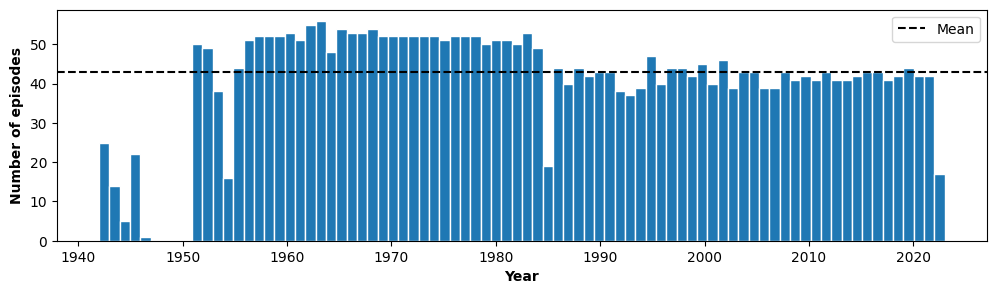

In [ ]:
fig = plt.figure(figsize=(12, 3))

n_bins = df.year.max() - df.year.min() + 1
plt.hist(df.year, bins=n_bins, edgecolor="white", color=sns.color_palette("Paired")[1])

freq = df.year.value_counts().to_frame()
mean_value = freq.mean().item()
plt.axhline(mean_value, linestyle='--', color='black', label='Mean')

plt.xlabel("Year", fontweight="bold")
plt.ylabel("Number of episodes", fontweight="bold")
plt.legend()
plt.show()

### Duration change by year

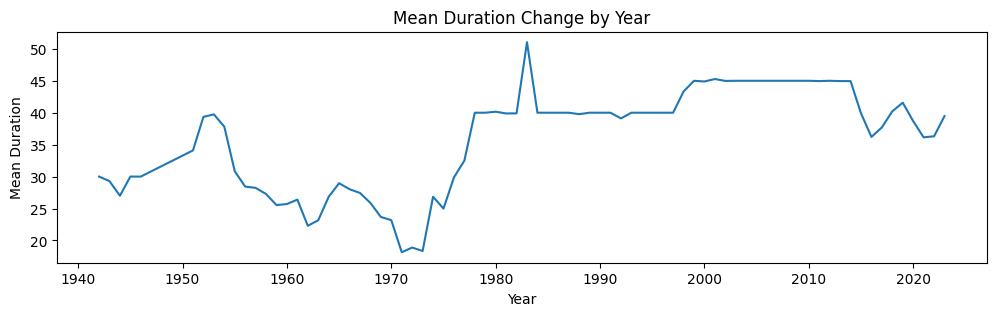

In [ ]:
# Group by year and calculate mean duration
mean_duration_by_year = df.groupby('year')['duration'].mean()

# Plot the mean duration by year
plt.figure(figsize=(12, 3))
plt.plot(mean_duration_by_year.index, mean_duration_by_year.values)
plt.xlabel('Year')
plt.ylabel('Mean Duration')
plt.title('Mean Duration Change by Year')
plt.show()

### Gender ratio

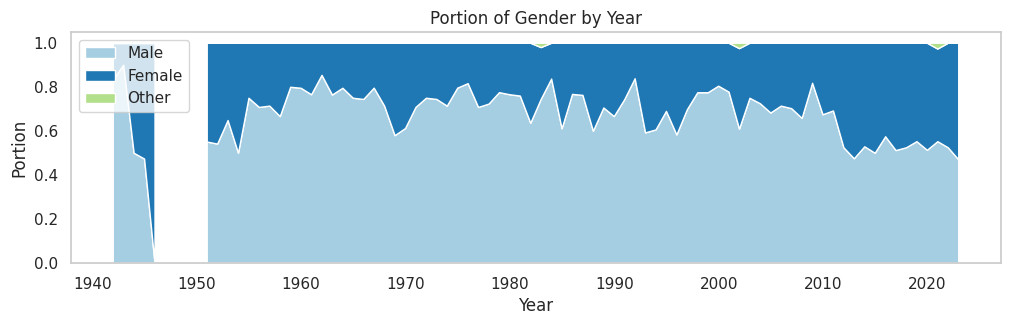

In [ ]:
# Reindex the DataFrame with a complete range of years
df_complete['gender'] = df['gender'].replace('NA', '')
df_complete = df.dropna(subset=['gender'])
df_complete = df.groupby('year')['gender'].value_counts().unstack().reindex(range(df['year'].min(), df['year'].max() + 1))

# Fill missing values with zeros
df_complete.fillna(0, inplace=True)

# Compute the portion of each gender for each year
total_counts = df_complete.sum(axis=1)
portion_male = df_complete['male'] / total_counts
portion_female = df_complete['female'] / total_counts
portion_other = 1 - (portion_male + portion_female)

# Plotting
plt.figure(figsize=(12, 3))
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")
plt.stackplot(df_complete.index, portion_male, portion_female, portion_other, \
              labels=['Male', 'Female', 'Other'], colors=pal)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Portion')
plt.title('Portion of Gender by Year')
plt.grid(False)
plt.show()


## Top 10

### Books and favourite songs

In [ ]:
book_series = pd.Series(df['book'])
book_counts = book_series.value_counts()

# Get the top 10 books based on appearance time
top_10_books = book_counts.head(10)
top_10_books

A La Recherche Du Temps Perdu - Marcel Proust                              42
War and Peace - Leo Tolstoy                                                39
Encyclopaedia Britannica                                                   32
Encyclopaedia                                                              30
The History of the Decline and Fall of the Roman Empire - Edward Gibbon    16
The Oxford Book of English Verse                                           16
The Lord of the Rings - J R R Tolkien                                      15
The Oxford English Dictionary                                              15
The Wind in the Willows - Kenneth Grahame                                  14
The Pickwick Papers - Charles Dickens                                      13
Name: book, dtype: int64

In [ ]:
favourite_series = pd.Series(df['favourite'])
favourite_counts = favourite_series.value_counts()

# Get the top 10 favourite songs based on appearance time
top_10_songs = favourite_counts.head(10)
top_10_songs

Ludwig van Beethoven       209
Wolfgang Amadeus Mozart    191
Johann Sebastian Bach      187
Franz Schubert              62
Edward Elgar                57
George Frideric Handel      47
Giuseppe Verdi              46
Johannes Brahms             36
Richard Strauss             30
Giacomo Puccini             30
Name: favourite, dtype: int64

### Luxuries

In [ ]:
nltk_stopwords = set(stopwords.words('english'))

freq_lux = defaultdict(int)

def plot_wordcloud(df):
  for lux in df["luxury"]:
      if pd.notnull(lux):  # Skip NaN values
          words = lux.lower().split()  # Split luxury value into words
          for word in words:
              if word not in nltk_stopwords and word.strip():  # Exclude stopwords and blank space
                  freq_lux[word] += 1

  wc = WordCloud(stopwords=nltk_stopwords,background_color = 'white').generate_from_frequencies(freq_lux)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

  # Sort word frequencies in descending order
  sorted_freq_lux = dict(sorted(freq_lux.items(), key=lambda x: x[1], reverse=True))
  # Get top 10 word frequencies
  top_10_freq_lux = dict(list(sorted_freq_lux.items())[:10])
  # Print top 10 word frequencies
  for word, frequency in top_10_freq_lux.items():
      print(f"Word: {word}, Frequency: {frequency}")

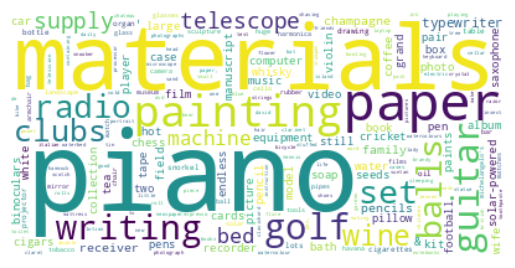

Word: piano, Frequency: 129
Word: materials, Frequency: 83
Word: paper, Frequency: 81
Word: painting, Frequency: 70
Word: guitar, Frequency: 51
Word: golf, Frequency: 49
Word: writing, Frequency: 47
Word: set, Frequency: 43
Word: balls, Frequency: 42
Word: radio, Frequency: 40


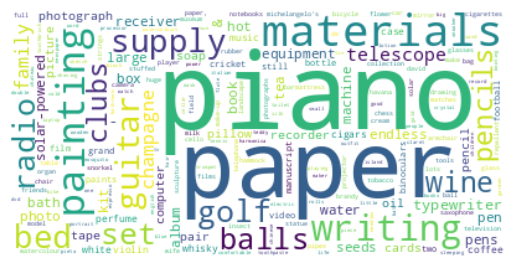

Word: piano, Frequency: 168
Word: paper, Frequency: 125
Word: materials, Frequency: 122
Word: painting, Frequency: 96
Word: writing, Frequency: 77
Word: supply, Frequency: 59
Word: bed, Frequency: 58
Word: guitar, Frequency: 57
Word: set, Frequency: 52
Word: golf, Frequency: 51


In [ ]:
# Generate wordcloud of luxuries by gender
plot_wordcloud(df[df.loc[:,'gender']=='male'])
plot_wordcloud(df[df.loc[:,'gender']=='female'])